# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report we will be analysing the "Now-Show Appointments" dataset that contains information from 100K medical appointments in Brasil, and is focused on the question of whether patients do or do not show up for their appointments.

We will examine and analyse the effect of age, being part of the Bolsa Familia Program, having received an sms, or living in a specific neighbourhood have an effect on whether or not patients show up to their appointments.

The questions we are looking forward to answering after we analyse the dataset are:
 1. Does age have any significance in whether or not patients show up for their appointments ?
 2. Is being part of the Brasilian Social Welfare Program "Bolsa Familia" have any significance on whether  or not patients show up for their appointments ?
 3. Does receiving an SMS have any significance in whether or not patients show up for their appointments ?
 4. Does living in a certain neighbourhood have any significance on whether patients show up for their appointments ?


> In the next cell we will import all the necessary packages and libraries to help in the data analysis process.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load the data and check for cleanliness. All cleaning activities will be included in the next section of this report.

### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> We use the .info(), .shape, and .describe() functions to have an overview of the data and to check if there are any missing data in the dataset

In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> it seems that the data in this dataset is consistent and there are no missing values

We will use the .duplicated() function to check if there are any duplicates in the dataset.

In [6]:
df.duplicated().sum()

0

> It seems there are no duplicates found in this dataset.

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> These are general statistics about our dataset.

> However, there seems to be a mistake where there is a patient with the age -1. So we will have to deal with it later in the cleaning section, so that it does not mess up the dataset.

Using visualizations to get an overview about the data and its distribution

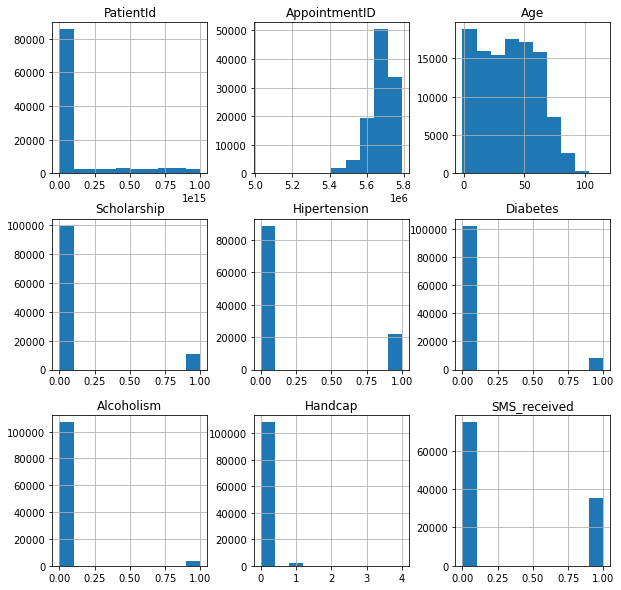

In [8]:
df.hist(figsize=(10, 10));


### Data Cleaning
In this section, we will clean the data and make sure the column names are consistent.

> We will change all column names to lowercase to make it easier to call column names later in the dataset.

In [9]:
df.rename(columns= lambda x: x.strip().lower(), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> It seems that the 2 columns; "hipertension" and "handcap" are spelt incorrectly, so we will rename both of those columns so that they're easier to call later in the dataset, and we'll check to see if the change took place

> We will change "hipertension" to "hypertension".

In [10]:
df.rename(columns={'hipertension': 'hypertension'}, inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> We will do the same for the "handcap" column and change it to "handicap".

In [11]:
df.rename(columns={'handcap': 'handicap'}, inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Concerning the "no-show" column, we will rename it to "no_show" to be able to perform functions without any errors.

In [12]:
df.rename(columns={'no-show': 'no_show'}, inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In this next step, we will drop unnecessary columns, or columns that do not contribute to the analysis, to make the dataset easier to read and decongested.

> Based on the research questions for this case, we will drop the "patientid", "appointmentid", "scheduledday" and "appointmentday" columns, and check to see if changes took place.

In [13]:
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1, inplace=True)
df.head(1)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In this next step, we will remove the row that contains the age -1, and then we will check to see if the changes took place.

In [14]:
df.loc[df['age'] == -1]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
df.drop([99832], axis=0, inplace=True)

In [16]:
df.loc[df['age'] == -1]

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [17]:
df.shape

(110526, 10)

> the row containing age = -1 has been removed

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we are going to explore the data and the relationship between the different variables.

First, we will visualize the difference between Shows and No-Shows


In [18]:
shows = df['no_show'] == 'No'
no_shows = df['no_show'] == 'Yes'

showed_up = shows.sum()
notshowed_up = no_shows.sum()

> We classify 'No' and 'Yes' values in the 'no_show' column to get the heights for the y-axis

In [19]:
locations = [1, 2]
heights = [showed_up, notshowed_up]
labels = ['No (Showed Up)', "Yes (Didn't Show Up)"]

> Then we use matplotlib to plot a bar chart to visualize the data

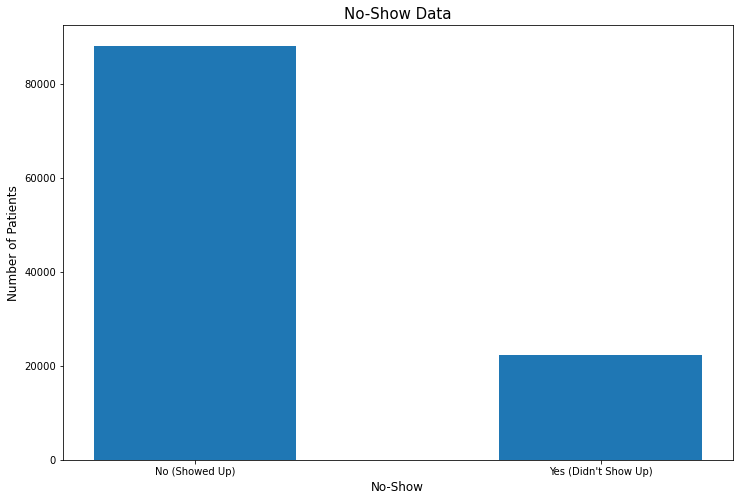

In [20]:
plt.subplots(figsize=(12, 8))
plt.bar(locations, heights, tick_label=labels, width=0.5)
plt.title("No-Show Data", size=15)
plt.xlabel('No-Show', size=12)
plt.ylabel('Number of Patients', size=12);

> Based on this visualization, we can see that the number of patients who showed up to their appointments is almost 4x the number of patients who didn't show up to their appointments

### Does age have any significance in whether or not patients show up for their appointments ?

> To further explore the relationship between age and whether or not patients show up for their appointments, we will plot the show and no-show histograms against each other and compare.

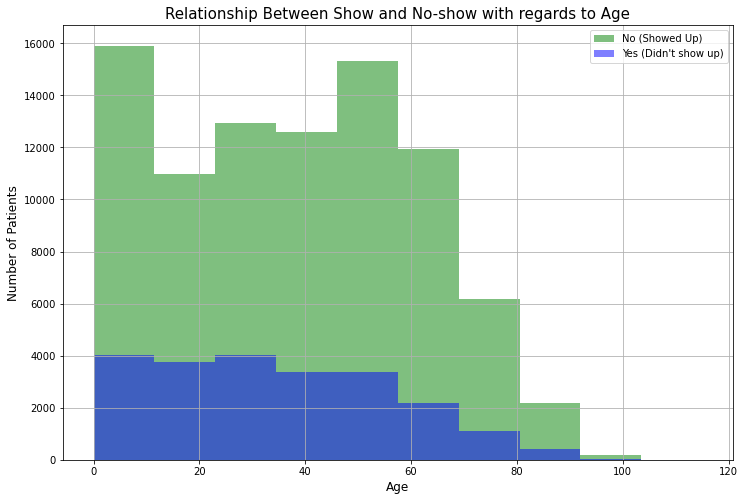

In [21]:
plt.figure(figsize=(12, 8))
df.age[shows].hist(alpha=0.5, color='green', label='No (Showed Up)')
df.age[no_shows].hist(alpha=0.5, color='blue', label="Yes (Didn't show up)")
plt.legend()
plt.title('Relationship Between Show and No-show with regards to Age', size=15)
plt.xlabel('Age', size=12)
plt.ylabel('Number of Patients', size=12);

> Based on this visualization, we can conclude that patients with younger ages are more likely to show up for their appointments.

### Is being part of the Brasilian Social Welfare Program "Bolsa Familia" have any significance on whether or not patients show up for their appointments ?


> To further explore the significance of being part of the Bolsa Familia Social Welfare Prorgram and whether or not patients show up for their appointments, we will plot the show and no-show bar charts against each other with regards to being a member.

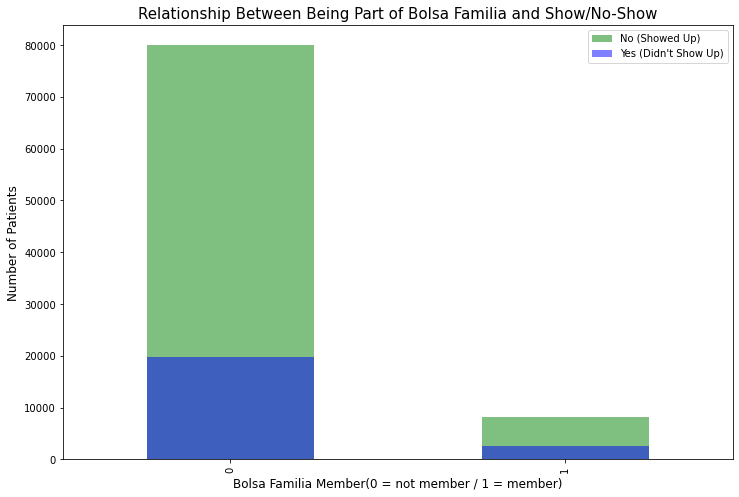

In [32]:
plt.figure(figsize=(12, 8))
df.scholarship[shows].value_counts().plot(kind='bar', alpha=0.5, color='green', label='No (Showed Up)')
df.scholarship[no_shows].value_counts().plot(kind='bar', alpha=0.5, color='blue', label="Yes (Didn't Show Up)")
plt.legend()
plt.title('Relationship Between Being Part of Bolsa Familia and Show/No-Show', size=15)
plt.xlabel('Bolsa Familia Member(0 = not member / 1 = member)', size=12)
plt.ylabel('Number of Patients', size=12);

> According to the previous visualization, we can conclude that being part of the Bolsa Familia Social Welfare Program does not have any significance as to whether patients would show up to their appointments or not.

### Does receiving an SMS have any significance in whether or not patients show up for their appointments ?

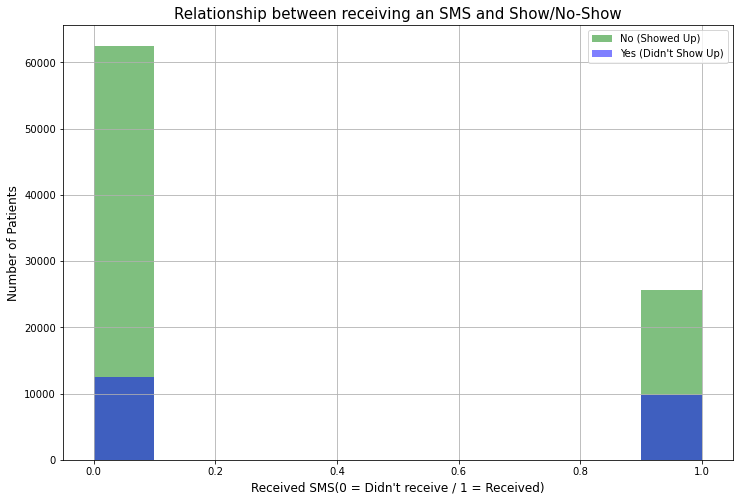

In [23]:
plt.figure(figsize=(12, 8))
df.sms_received[shows].hist(alpha=0.5, color='green', label='No (Showed Up)')
df.sms_received[no_shows].hist(alpha=0.5, color='blue', label="Yes (Didn't Show Up)")
plt.legend()
plt.title('Relationship between receiving an SMS and Show/No-Show', size=15)
plt.xlabel("Received SMS(0 = Didn't receive / 1 = Received)", size=12)
plt.ylabel('Number of Patients', size=12);

> Based on the data visualization above, it seems that receiving a SMS has no significance in whether patients show up to their appointments or not. Surprisingly, the number of patients who didn't receive a SMS and showed up is much higher than those who received and showed up. 

### Does living in a certain neighbourhood have any significance on whether patients show up for their appointments ?


> To explore if patients living in certain neighbourhoods has any significance on whether patients show up or don't show up for their appointments, we need to plot the different neighbourhoods and the Show/No-Show data on a bar chart and see the results

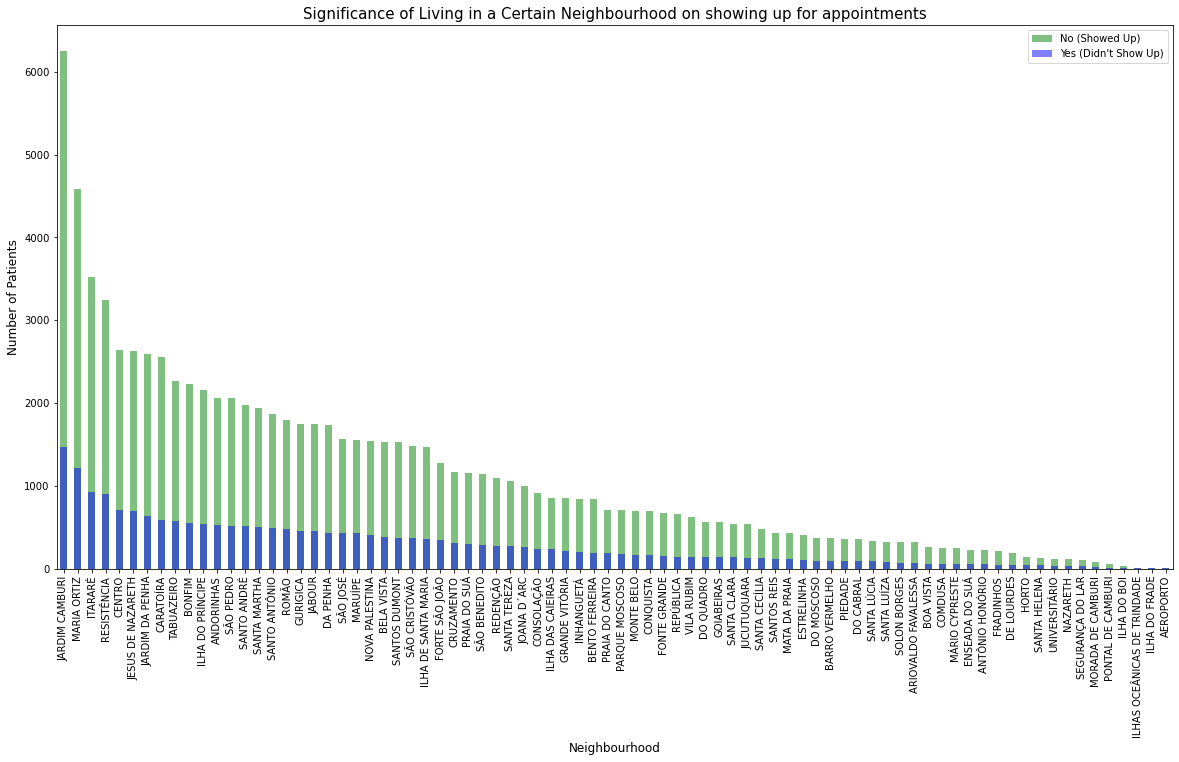

In [46]:
plt.figure(figsize=(20, 10))
df.neighbourhood[shows].value_counts().plot(kind='bar', alpha=0.5, color='green', label='No (Showed Up)')
df.neighbourhood[no_shows].value_counts().plot(kind='bar', alpha=0.5, color='blue', label="Yes (Didn't Show Up)")
plt.legend()
plt.title('Significance of Living in a Certain Neighbourhood on showing up for appointments', size=15)
plt.xlabel('Neighbourhood', size=12)
plt.ylabel('Number of Patients', size=12);

> Based on the visualization it seems that there is a relationship between living in specific neighbourhoods and patients showing up or not showing up for their appointments. According to the graph above, the data suggests that patients living in "Jardim Camburi" and "Maria Ortiz" neighbourhoods are more likely to show up for their appointments. While patients living in "Aeroporto" and "Ilha Do Frade" are less likely to show up for their appointments.

<a id='conclusions'></a>
## Conclusions

> Upon cleaning the data and performing different data analysis processes on the dataset provided, based on the visualizations provided by the data, we can conclude that:

1. The number of patients that showed up for their appointments is almost 4 times more than the number of patients that have missed their appointments.

2. Patients with younger age are more likely to show up for their appointments than patients who are much older. However, according to the data there is no significance as to whether age is related to patients not showing up for their appointments.

3. There is no relationship between being part of the Bolsa Familia Social Welfare Program and patients showing up for their appointments. The data implies that more patients who are not part of the program showed up for their appointments, as opposed to patients who are part of the program.

4. The data suggests that receiving a SMS has no significance in whether patients show up to their appointments or not. The number of patients who didn't receive a SMS and showed up is much higher than those who received a SMS and showed up. 

5. The data suggests that there is, in fact, a relationship between people living in certain neighbourhoods and the likelihood that they would show up for their appointments. 

> However, the **limitation** to this dataset is that there isn't a significant relationship between the variables provided in the dataset and whether patients show up or don't show up for their appointments.